In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" r
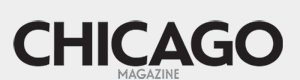

In [2]:
url_base = 'http://www.chicagomag.com'
url_sub='/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')

soup

In [3]:
print(soup.find_all('div','sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Al

In [4]:
len(soup.find_all('div','sammy'))

50

In [5]:
print(soup.find_all('div','sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>


In [6]:
tmp_one = soup.find_all('div','sammy')[0]
type(tmp_one)

bs4.element.Tag

In [7]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

In [8]:
tmp_one.find(class_='sammyRank').get_text()

'1'

In [9]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [10]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [11]:
import re

tmp_string = tmp_one.find(class_='sammyListing').get_text()

sss = re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0])
print(re.split(('\n|\r\n'), tmp_string)[1])

BLT
Old Oak Tap


In [12]:
from urllib.parse import urljoin

In [13]:
rank =[]
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div','sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = (item.find(class_='sammyListing').get_text())
    
    main_menu.append(re.split(('\r\n|\n'), tmp_string)[0])
    cafe_name.append(re.split(('\r\n|\n'), tmp_string)[1])
    
    url_add.append(urljoin(url_base, item.find('a')['href']))
    
    

In [14]:
rank[:5]

['1', '2', '3', '4', '5']

In [16]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [17]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [18]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [19]:
len(rank), len(main_menu), len(cafe_name),len(url_add)

(50, 50, 50, 50)

In [20]:
import pandas as pd

In [21]:
data = {'Rank':rank, 'Menu':main_menu,'Cafe':cafe_name,'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Cafe,URL
0,1,BLT,Old Oak Tap,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Fried Bologna,Au Cheval,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Woodland Mushroom,Xoco,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Roast Beef,Al’s Deli,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,PB&L,Publican Quality Meats,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [22]:
df = pd.DataFrame(data, columns=['Rank','Cafe','Menu','URL'])
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [23]:
df.to_csv("C://BigData/DataScience/data/03. best_sandwiches_list_chicago.csv", sep=',', encoding='utf-8')

In [26]:
df = pd.read_csv('c://BigData/DataScience/data/03. best_sandwiches_list_chicago.csv' ,index_col=0)
df

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...
5,6,Hendrickx Belgian Bread Crafter,Belgian Chicken Curry Salad,http://www.chicagomag.com/Chicago-Magazine/Nov...
6,7,Acadia,Lobster Roll,http://www.chicagomag.com/Chicago-Magazine/Nov...
7,8,Birchwood Kitchen,Smoked Salmon Salad,http://www.chicagomag.com/Chicago-Magazine/Nov...
8,9,Cemitas Puebla,Atomica Cemitas,http://www.chicagomag.com/Chicago-Magazine/Nov...
9,10,Nana,Grilled Laughing Bird Shrimp and Fried Po’ Boy,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [27]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//ping.chartbeat.net" rel="dns-prefetch"/>
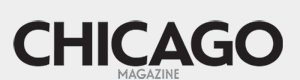

In [29]:
html= urlopen(df['URL'][0])
soup_tmp= BeautifulSoup(html, 'html.parser')
soup_tmp

In [33]:
print(soup_tmp.find('p', 'addy').get_text())


$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com


In [34]:
price_tmp = soup_tmp.find('p','addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [35]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [36]:
price_tmp.split()[0]

'$10.'

In [37]:
price_tmp.split()[0][:-1]

'$10'

In [38]:
''.join(price_tmp.split()[1:-2])

'2109W.ChicagoAve.,'

In [39]:
price =[]
address =[]

for n in df.index[:3]:
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html,'lxml')
    
    gettings = soup_tmp.find('p','addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(''.join(gettings.split()[1:-2]))

In [40]:
price

['$10', '$9', '$9.50']

In [41]:
address

['2109W.ChicagoAve.,', '800W.RandolphSt.,', '445N.ClarkSt.,']

In [43]:
from tqdm import tqdm_notebook

price =[]
address=[]

for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p','addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(''.join(gettings.split()[1:-2]))

In [44]:
price

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

In [45]:
address

['2109W.ChicagoAve.,',
 '800W.RandolphSt.,',
 '445N.ClarkSt.,',
 '914NoyesSt.,Evanston,',
 '825W.FultonMkt.,',
 '100E.Walton',
 '1639S.WabashAve.,',
 '2211W.NorthAve.,',
 '3619W.NorthAve.,',
 '3267S.HalstedSt.,',
 '2537N.KedzieBlvd.,',
 'Multiple',
 '3124N.Broadway,',
 '3455N.SouthportAve.,',
 '2657N.KedzieAve.,',
 '1120W.GrandAve.,',
 '1141S.JeffersonSt.,',
 '333E.BentonPl.,',
 '1411N.WellsSt.,',
 '1747N.DamenAve.,',
 '3209W.IrvingPark',
 'Multiple',
 '5347N.ClarkSt.,',
 '2954W.IrvingParkRd.,',
 'Multiple',
 '191SkokieValleyRd.,HighlandPark,',
 'Multiple',
 '1818W.WilsonAve.,',
 '2517W.DivisionSt.,',
 '218W.Kinzie',
 'Multiple',
 '1547N.WellsSt.,',
 '415N.MilwaukeeAve.,',
 '1840N.DamenAve.,',
 '1220W.WebsterAve.,',
 '5357N.AshlandAve.,',
 '1834W.MontroseAve.,',
 '615N.StateSt.,',
 'Multiple',
 '241N.YorkRd.,Elmhurst,',
 '1323E.57thSt.,',
 '655ForestAve.,LakeForest,',
 'HotelLincoln,1816N.ClarkSt.,',
 '100S.MarionSt.,OakPark,',
 '26E.CongressPkwy.,',
 '2018W.ChicagoAve.,',
 '25E.Delawa

In [46]:
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [47]:
len(price), len(address), len(df)

(50, 50, 50)

In [48]:
df['Price'] = price
df['Address'] = address

df = df.loc[:,['Rank','Cafe','Menu','Price','Address']]
df.set_index('Rank', inplace=True)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109W.ChicagoAve.,"
2,Au Cheval,Fried Bologna,$9,"800W.RandolphSt.,"
3,Xoco,Woodland Mushroom,$9.50,"445N.ClarkSt.,"
4,Al’s Deli,Roast Beef,$9.40,"914NoyesSt.,Evanston,"
5,Publican Quality Meats,PB&L,$10,"825W.FultonMkt.,"


In [49]:
df.to_csv('c://BigData/DataScience/data/03. best_sandwiches_list_chicago2.csv', sep=',' , encoding='utf-8')

In [50]:
import folium
import pandas as pd
import googlemaps
import numpy as np

In [51]:
df = pd.read_csv('c://BigData/DataScience/data/03. best_sandwiches_list_chicago2.csv', index_col=0)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109W.ChicagoAve.,"
2,Au Cheval,Fried Bologna,$9,"800W.RandolphSt.,"
3,Xoco,Woodland Mushroom,$9.50,"445N.ClarkSt.,"
4,Al’s Deli,Roast Beef,$9.40,"914NoyesSt.,Evanston,"
5,Publican Quality Meats,PB&L,$10,"825W.FultonMkt.,"


In [52]:
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [53]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    if df['Address'][n] !='Multiple':
        target_name = df['Address'][n] +', '+'Chicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
        
    else:
        lat.append(np.nan)
        lng.append(np.nan)

In [54]:
len(lat), len(lng)

(50, 50)

In [55]:
df['lat'] = lat
df['lng'] = lng
df.head()

,Cafe,Menu,Price,Address,lat,lng
Rank,,,,,,
1,Old Oak Tap,BLT,$10,"2109W.ChicagoAve.,",41.895605,-87.679961
2,Au Cheval,Fried Bologna,$9,"800W.RandolphSt.,",41.884658,-87.647667
3,Xoco,Woodland Mushroom,$9.50,"445N.ClarkSt.,",41.890618,-87.630933
4,Al’s Deli,Roast Beef,$9.40,"914NoyesSt.,Evanston,",42.058322,-87.683748
5,Publican Quality Meats,PB&L,$10,"825W.FultonMkt.,",41.886606,-87.648494


In [56]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=11)
folium.Marker([df['lat'].mean(),df['lng'].mean()], popup='center').add_to(mapping)
mapping

In [59]:
mapping = folium.Map(location=[df['lat'].mean(),df['lng'].mean()], zoom_start=11)

for n in df.index:
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], 
                                      popup=df['Cafe'][n]).add_to(mapping)
        
mapping